<a href="https://colab.research.google.com/github/chengchun100/start2/blob/main/2_danmu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request as req
url = "https://github.com/Elwing-Chou/nanshan1115/raw/main/danmu.txt"
req.urlretrieve(url, "damu.txt")

In [ ]:
#要把檔案中的字串改為list和字典型態，所以配合json
import json
f = open("damu.txt", "r", encoding="utf-8")
danmus = json.load(f)
f.close()
danmus

In [ ]:
#pd.DataFrame型態:表格
import pandas as pd
df = pd.json_normalize(danmus)
df

In [ ]:
# matplotlib: 基礎的畫圖函式庫
# seaborn: 進階畫圖函式庫
import matplotlib.pyplot as plt
import seaborn as sns
#bins是間隔的意思，kde是核修勻，可以看連續時間分布下實際上的熱度
sns.histplot(x=df["time"], bins=100, kde=True)

In [ ]:
# 1. 表格篩選操作,DataFrame[跟你資料筆數依樣多的True/False]
test = pd.DataFrame([
    [1,2],
    [3,4],
    [5,6]
])
test[[True,False,True]]

In [ ]:
#pandas第一種型態: DataFrame
#第二種型態: Series(只取出一列或是一行)
#如果取filter會用到Python內建功能，所以不能拿它當變數
#連接兩個篩選條件的方法:而且(&) 或者(|)
fil = (df["time"] > 65000) & (df["color"] == "#FFFFFF")
df[fil]

In [ ]:
#2.轉換操作: apply
#型態:字典, 操作[key]
#函式也是種型態:函式 e.g.int，小括號是操作出這個功能:(4.2)，所以兩者是可以分開的
b = int
b(4.2)

In [ ]:
def square(n):
    ans = n * n
    return ans
square(4)

In [ ]:
#接下來示範對表格中的每一個元素都做處理的操作
#首先示範Series的轉換操作，建立一個Series後，應用前面寫的平方功能
#apply會對表格中每一個元素都進行所定義的功能操作一遍
test = pd.Series([1,2,3])
test.apply(square)

In [38]:
#這部分的code是先前在介紹jieba時所用的coding
import urllib.request as req
import jieba

url = "https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big"
req.urlretrieve(url, "dict.big")
jieba.set_dictionary("dict.big")

In [ ]:
#將表格中每一則彈幕的內容進行「分詞」，運用到剛剛介紹的apply(功能)
def func(s):
    return " ".join(jieba.cut(s))
df["text"] = df["text"].apply(func)
df

In [ ]:
#把彈幕中所有的分詞作輿情分析，並計算出各詞彙的TF-IDF得分
import jieba.analyse
article = "\n".join(df["text"])
result = jieba.analyse.extract_tags(article, topK=50, withWeight=True)
#儲存完result後，透過pandas的功能，將result轉成dataframe
keywords = pd.DataFrame(result, columns=["keyword","tfidf"])
keywords

In [50]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 在執行繪圖時，常常會遇到字體變成豆腐字的狀況，代表程式顯示不出來
# 這一段程式碼有需要直接複製貼上就好了，不用背起來
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

url = "https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download"
req.urlretrieve(url, "TaipeiSansTCBeta-Regular.ttf")
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

title:標題
axis:軸
label:軸標籤
ticks:軸刻度
legend:圖例

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '大哥'),
  Text(1, 0, '沒有'),
  Text(2, 0, '2021'),
  Text(3, 0, '2022'),
  Text(4, 0, '10'),
  Text(5, 0, 'QQ'),
  Text(6, 0, '巴哈'),
  Text(7, 0, '什麼'),
  Text(8, 0, '11'),
  Text(9, 0, '12'),
  Text(10, 0, '怎麼'),
  Text(11, 0, '留名'),
  Text(12, 0, '煉獄'),
  Text(13, 0, '...'),
  Text(14, 0, '免費'),
  Text(15, 0, '神作'),
  Text(16, 0, '三哥'),
  Text(17, 0, '可愛'),
  Text(18, 0, '付費'),
  Text(19, 0, '真的'),
  Text(20, 0, 'BGM'),
  Text(21, 0, '火車'),
  Text(22, 0, '這裡'),
  Text(23, 0, '還是'),
  Text(24, 0, '不會'),
  Text(25, 0, '炭治郎'),
  Text(26, 0, '電影院'),
  Text(27, 0, '嗚嗚'),
  Text(28, 0, '應該'),
  Text(29, 0, '豬豬'),
  Text(30, 0, '出來'),
  Text(31, 0, 'www'),
  Text(32, 0, '那個'),
  Text(33, 0, '開始'),
  Text(34, 0, '一樣'),
  Text(35, 0, '這段'),
  Text(36, 0, '喜歡')

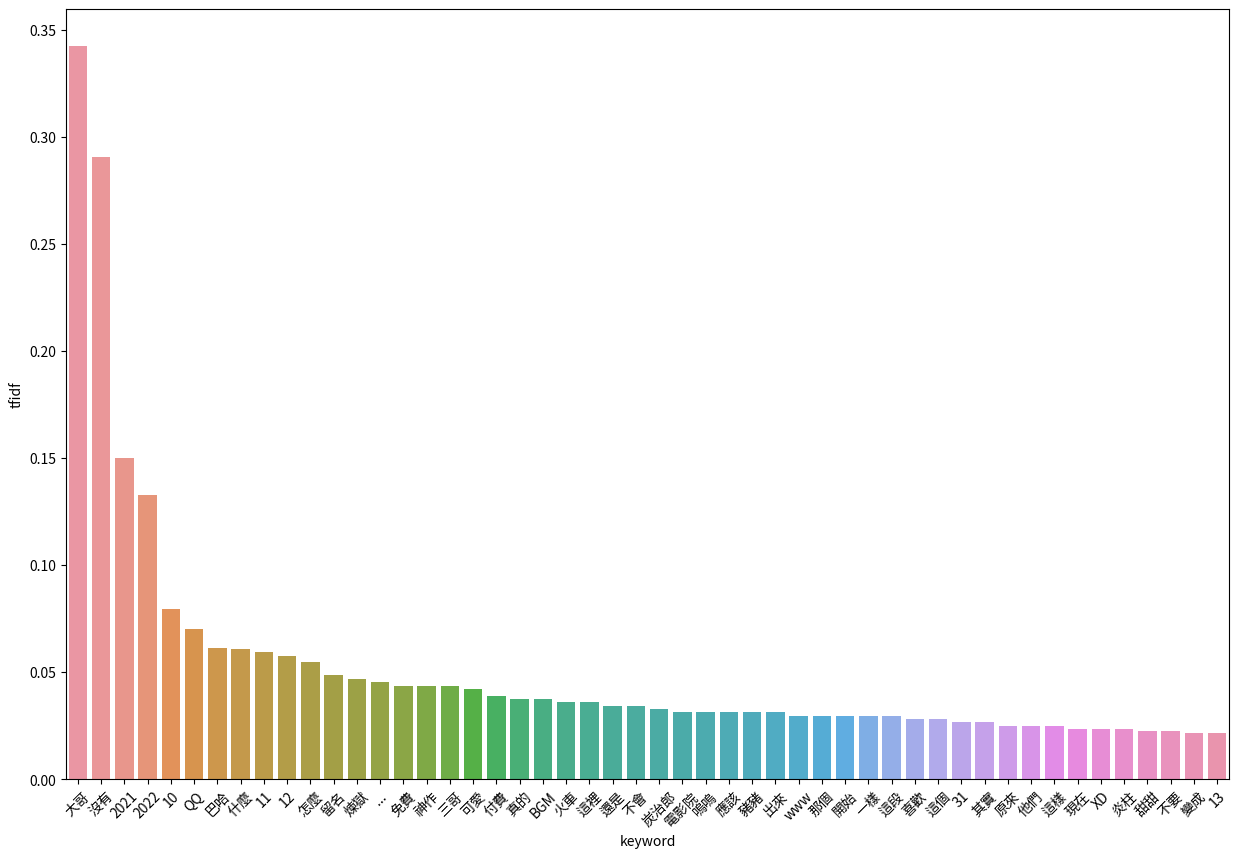

In [55]:
#plt.figure(figsize=[寬度,高度])
plt.figure(figsize=[15,10])
sns.barplot(x=keywords["keyword"],
      y=keywords["tfidf"])
#由於x軸的keywords太擠了，所以要旋轉字體角度，讓每個關鍵字都能被看清楚
plt.xticks(rotation=45)